In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from PIL import Image, ImageOps
from objectmapping import ObjectMapping
from mrcnn_classes import class_names

Using TensorFlow backend.


In [2]:
# delete--testing only
from PIL import ImageDraw, ImageFont
from matplotlib.pyplot import imshow

In [3]:
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

In [4]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('../data/mask_rcnn_coco.h5', by_name=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


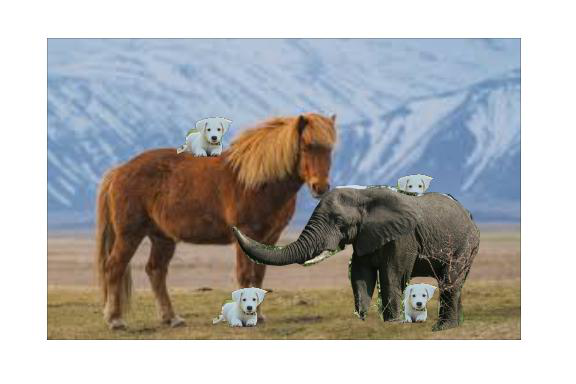

In [5]:
#load image
imagefile = '../images/animals_test_mixed_hidden-5.jpg'
img = load_img(imagefile)
img

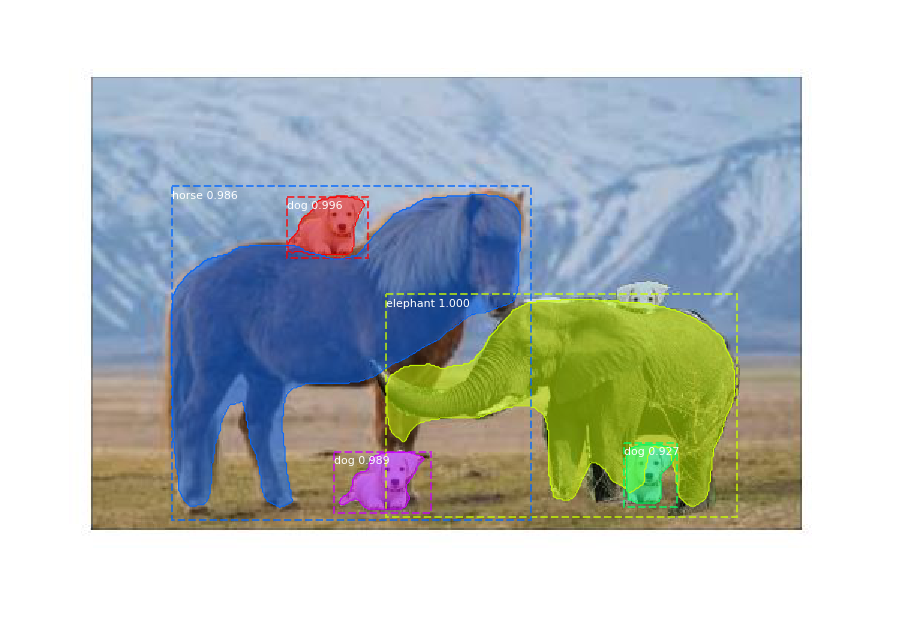

CPU times: user 7.62 s, sys: 740 ms, total: 8.36 s
Wall time: 6.71 s


In [6]:
%%time
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# Start Testing

In [7]:
ids = x.get_objectID()
ids

{1: 'elephant', 2: 'dog', 3: 'dog', 4: 'horse', 5: 'dog'}

In [8]:
x.object_class(1)

'elephant'

In [9]:
len(ids)

5

In [10]:
x.count_objects()

{'dog': 3, 'elephant': 1, 'horse': 1}

In [0]:
%%time
x.object_relations()

Analyzing object_id 1: elephant and object_id 2: dog
Analyzing object_id 1: elephant and object_id 3: dog
Analyzing object_id 1: elephant and object_id 4: horse
Analyzing object_id 1: elephant and object_id 5: dog
Analyzing object_id 2: dog and object_id 3: dog
Analyzing object_id 2: dog and object_id 4: horse
Analyzing object_id 2: dog and object_id 5: dog
Analyzing object_id 3: dog and object_id 4: horse
Analyzing object_id 3: dog and object_id 5: dog
Analyzing object_id 4: horse and object_id 5: dog
CPU times: user 4.33 s, sys: 8.81 ms, total: 4.34 s
Wall time: 4.36 s


{'object relations': {'above': [(1, 5), (2, 4), (2, 4), (4, 3)],
  'below': [(5, 1), (4, 2), (4, 2)],
  'in': [],
  'next to': [(1, 3), (1, 4), (1, 5), (3, 4)],
  'on': [(2, 4)],
  'touching': [(1, 5), (2, 4)]}}

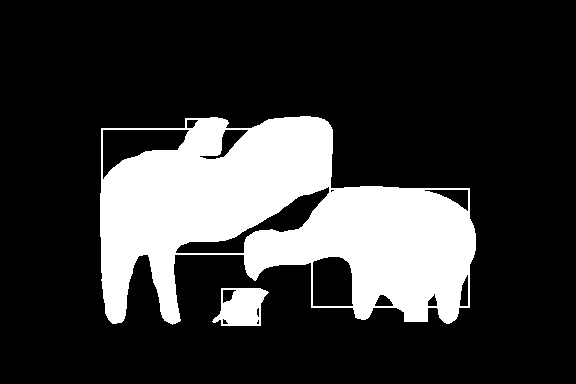

In [11]:
x.show_mask(1,2,3,4,5, show_massbox=True)

{('H', 4), ('I', 4), ('H', 5), ('I', 5)}


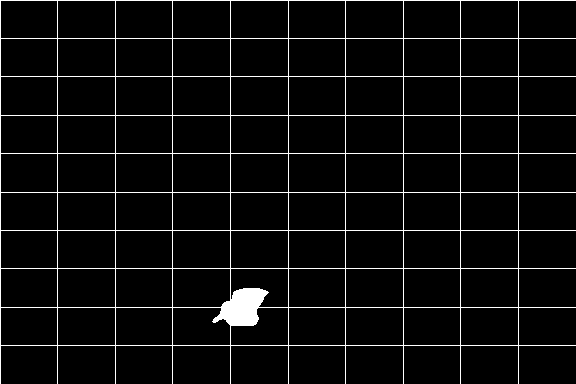

In [12]:
comp, cd = x.grid_coords(object_id=3, height=10, width=10, grid = True)
print(cd)
comp

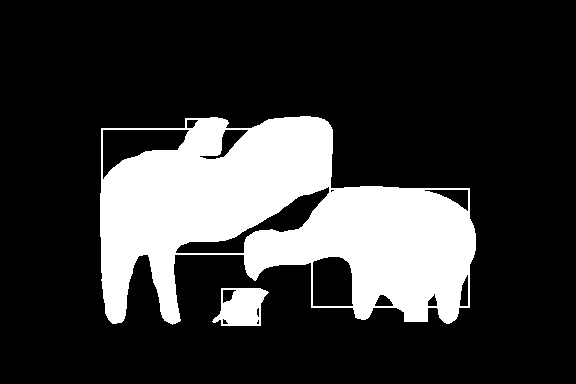

In [13]:
x.show_mask(1,2,3,4,5, show_massbox=True)

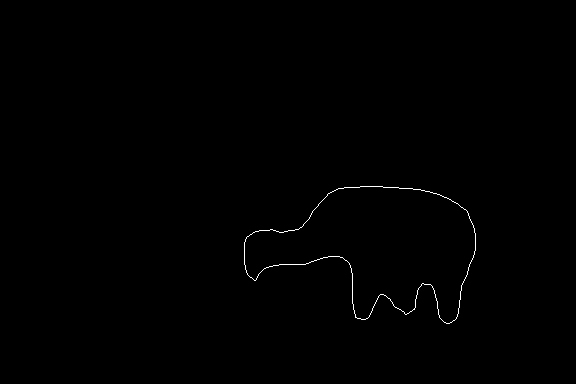

In [14]:
outline1 = x.object_outline(1)
x.show_mask(outline1)

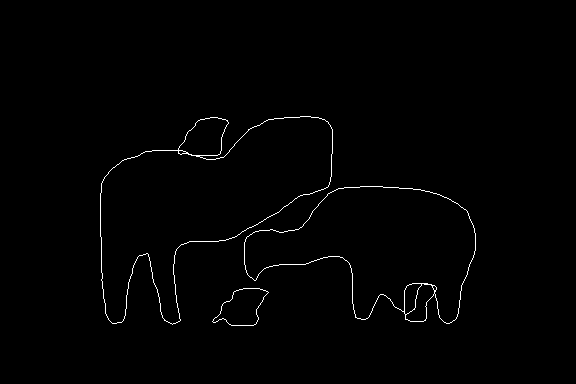

In [15]:
outline1 = x.object_outline(1,2,3,4,5)
x.show_mask(outline1)

In [15]:
#pass_object_id
x.object_location(3)

('bottom', 'center')

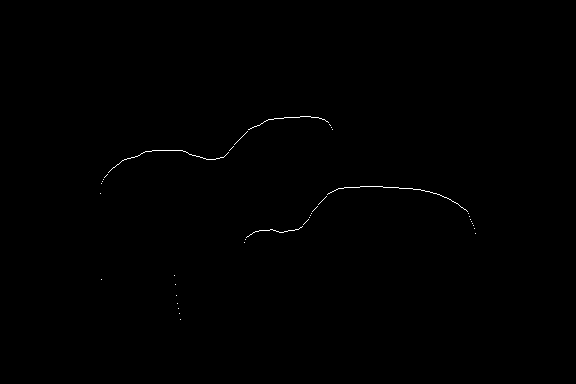

In [16]:
topline = x.object_topline(4,1)
x.show_mask(topline)

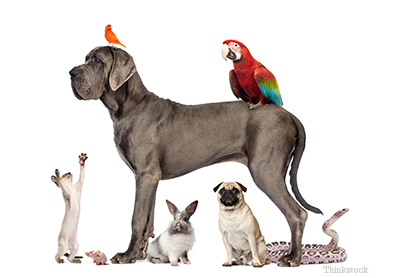

In [29]:
#load image

img = load_img('../images/mix_dog-cat-bird.jpg')
img

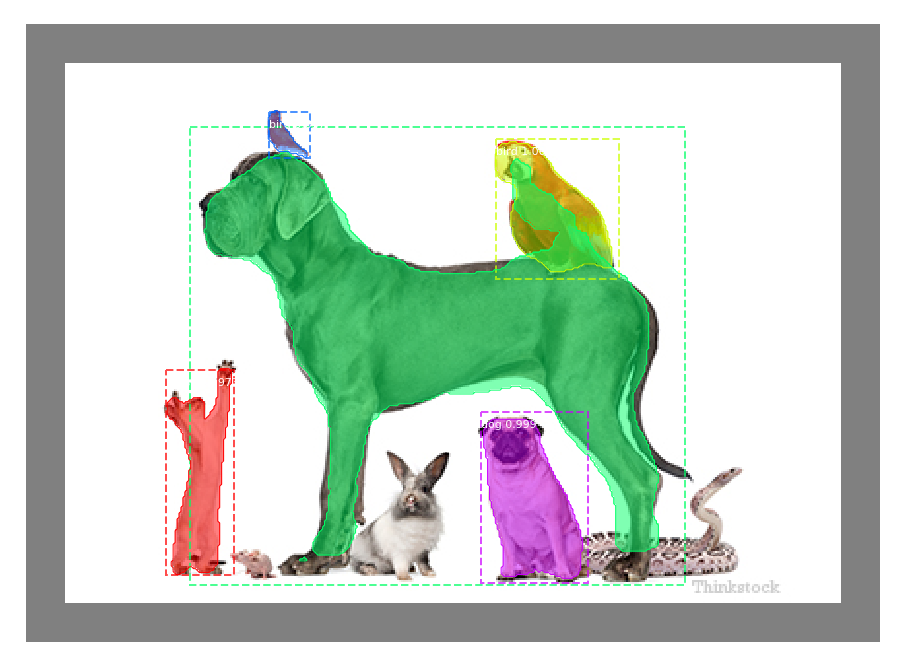

In [94]:
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping('images/mix_dog-cat-bird.jpg', r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [56]:
x.get_objectID()

{1: 'bird', 2: 'dog', 3: 'dog', 4: 'bird', 5: 'person', 6: 'dog', 7: 'cat'}

In [0]:
x.count_objects()

{'bird': 3, 'dog': 3, 'person': 1}

In [0]:
x.grid_coords(4)

{('B', '1'), ('C', '1')}

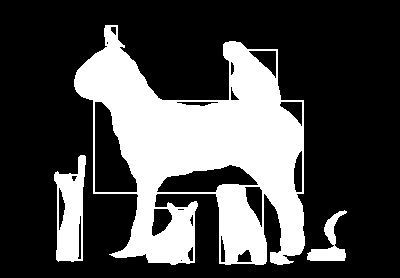

In [0]:
x.show_mask(1,2,3,4,5,6,7, show_massbox=True)

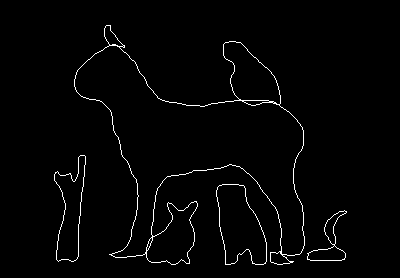

In [0]:
outline = x.object_outline(1,2,3,4,5,6,7)
x.show_mask(outline)

In [0]:
x.object_location(4)

('bottom', 'left')

In [0]:
%%time
x.object_relations()

Analyzing object_id 1: bird and object_id 2: dog
Analyzing object_id 1: bird and object_id 3: dog
Analyzing object_id 1: bird and object_id 4: person
Analyzing object_id 1: bird and object_id 5: bird
Analyzing object_id 1: bird and object_id 6: dog
Analyzing object_id 1: bird and object_id 7: bird
Analyzing object_id 2: dog and object_id 3: dog
Analyzing object_id 2: dog and object_id 4: person
Analyzing object_id 2: dog and object_id 5: bird
Analyzing object_id 2: dog and object_id 6: dog
Analyzing object_id 2: dog and object_id 7: bird
Analyzing object_id 3: dog and object_id 4: person
Analyzing object_id 3: dog and object_id 5: bird
Analyzing object_id 3: dog and object_id 6: dog
Analyzing object_id 3: dog and object_id 7: bird
Analyzing object_id 4: person and object_id 5: bird
Analyzing object_id 4: person and object_id 6: dog
Analyzing object_id 4: person and object_id 7: bird
Analyzing object_id 5: bird and object_id 6: dog
Analyzing object_id 5: bird and object_id 7: bird
Analy

{'object relations': {'above': [(1, 2),
   (1, 2),
   (1, 3),
   (2, 3),
   (2, 4),
   (2, 6),
   (7, 2),
   (7, 2)],
  'below': [(2, 1), (2, 1), (6, 2), (2, 7), (2, 7)],
  'in': [],
  'next to': [(2, 3), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6)],
  'on': [(1, 2), (7, 2)],
  'touching': [(1, 2), (2, 5), (2, 6), (2, 7)]}}

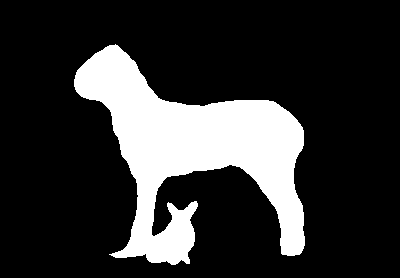

In [0]:
x.show_mask(2,6)

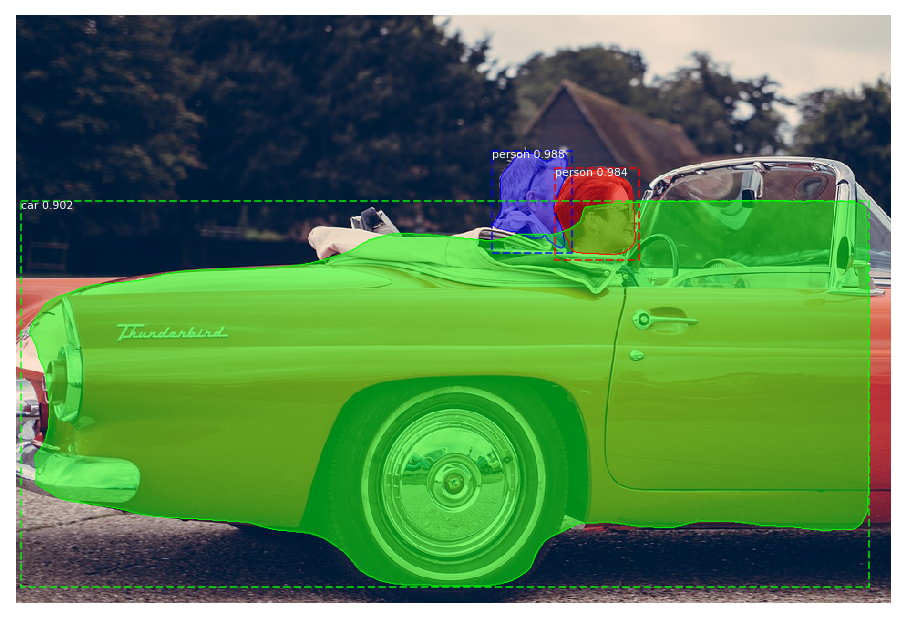

In [24]:
imagefile = '../images/people_in_car_noborder_org.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [26]:
x.count_objects()

{'car': 1, 'person': 2}

In [27]:
x.get_objectID()

{1: 'person', 2: 'person', 3: 'car'}

In [28]:
x.object_relations()

Analyzing object_id 1:person   and   object_id 2:person
Analyzing object_id 1:person   and   object_id 3:car
Analyzing object_id 2:person   and   object_id 3:car


{'object relations': {'next to': [(1, 2)],
  'above': [(1, 3), (1, 3), (2, 3), (2, 3)],
  'below': [(3, 1), (3, 1), (3, 2), (3, 2)],
  'touching': [(1, 2), (1, 3), (2, 3)],
  'on': [(1, 3), (2, 3)],
  'in': []}}

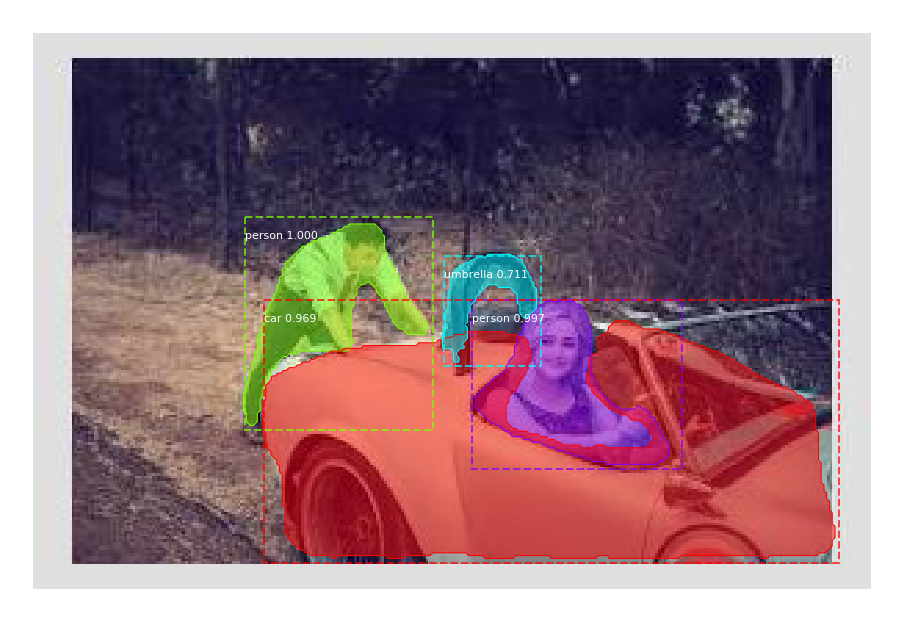

In [0]:
imagefile = '../images/mod_people_in_car2.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'car': 1, 'person': 2, 'umbrella': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'person', 3: 'car', 4: 'umbrella'}

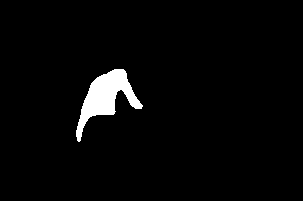

In [0]:
x.show_mask(1)

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: person
Analyzing object_id 1: person and object_id 3: car
Analyzing object_id 1: person and object_id 4: umbrella
Analyzing object_id 2: person and object_id 3: car
Analyzing object_id 2: person and object_id 4: umbrella
Analyzing object_id 3: car and object_id 4: umbrella


{'object relations': {'above': [(1, 3),
   (1, 3),
   (2, 3),
   (2, 3),
   (4, 2),
   (4, 3),
   (4, 3)],
  'below': [(3, 1), (3, 1), (3, 2), (3, 2), (2, 4), (3, 4), (3, 4)],
  'in': [],
  'next to': [(1, 2), (1, 4), (2, 4)],
  'on': [(1, 3), (2, 3), (4, 3)],
  'touching': [(1, 3), (2, 3), (2, 4), (3, 4)]}}

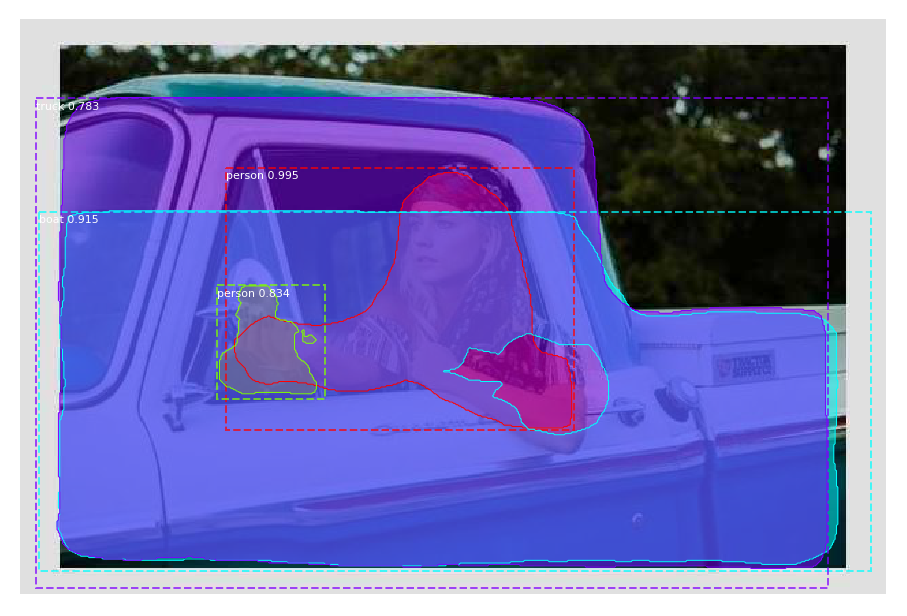

In [0]:
imagefile = '../images/mod_people_in_car3.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'boat': 1, 'person': 2, 'truck': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'boat', 3: 'person', 4: 'truck'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: boat
Analyzing object_id 1: person and object_id 3: person
Analyzing object_id 1: person and object_id 4: truck
Analyzing object_id 2: boat and object_id 3: person
Analyzing object_id 2: boat and object_id 4: truck
Analyzing object_id 3: person and object_id 4: truck


{'object relations': {'above': [(1, 2),
   (1, 2),
   (1, 3),
   (1, 3),
   (1, 4),
   (3, 2),
   (4, 2),
   (4, 3),
   (4, 3)],
  'below': [(2, 1),
   (2, 1),
   (3, 1),
   (3, 1),
   (4, 1),
   (2, 3),
   (2, 4),
   (3, 4),
   (3, 4)],
  'in': [(1, 4), (3, 2)],
  'next to': [(2, 4)],
  'on': [(1, 2), (1, 3), (4, 3)],
  'touching': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]}}

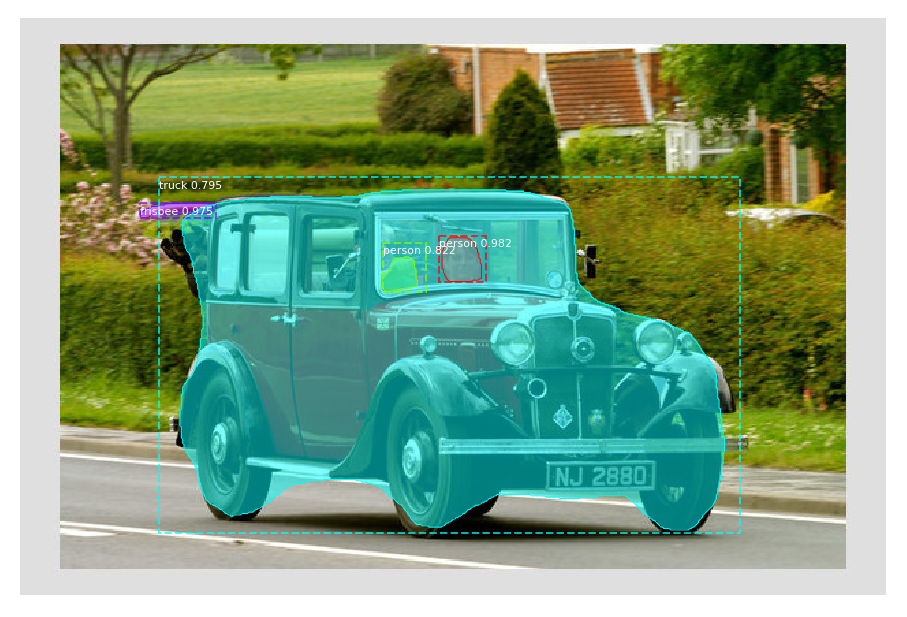

In [0]:
imagefile = '../images/mod_people_in_car4.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'frisbee': 1, 'person': 2, 'truck': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'frisbee', 3: 'person', 4: 'truck'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: frisbee
Analyzing object_id 1: person and object_id 3: person
Analyzing object_id 1: person and object_id 4: truck
Analyzing object_id 2: frisbee and object_id 3: person
Analyzing object_id 2: frisbee and object_id 4: truck
Analyzing object_id 3: person and object_id 4: truck


{'object relations': {'above': [(1, 4), (2, 4), (2, 4), (3, 4)],
  'below': [(4, 1), (4, 2), (4, 2), (4, 3)],
  'in': [(1, 4), (3, 4)],
  'next to': [(1, 3)],
  'on': [(2, 4)],
  'touching': [(1, 4), (2, 4), (3, 4)]}}

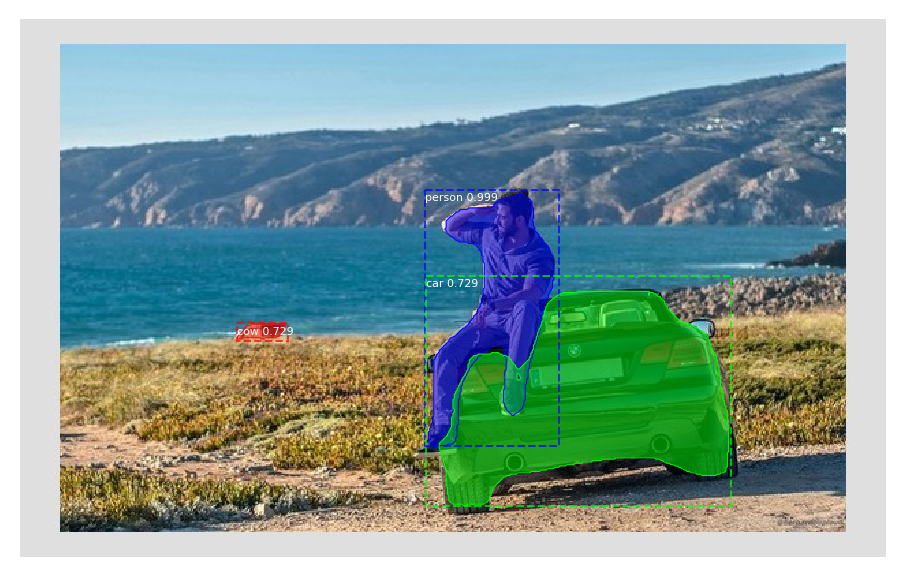

In [0]:
imagefile = '../images/mod_people_on_car1.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'car': 1, 'cow': 1, 'person': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'car', 3: 'cow'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: car
Analyzing object_id 1: person and object_id 3: cow
Analyzing object_id 2: car and object_id 3: cow


{'object relations': {'next to': [],
  'above': [(1, 2), (1, 2)],
  'below': [(2, 1)],
  'touching': [(1, 2)],
  'on': [(1, 2)],
  'in': []}}

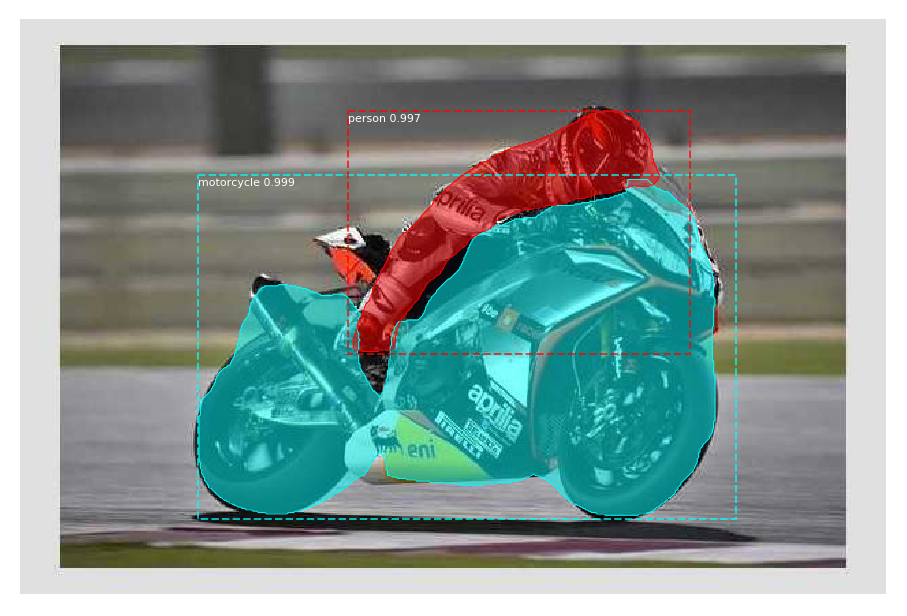

In [0]:
imagefile = '../images/mod_people_on_motorcycle.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

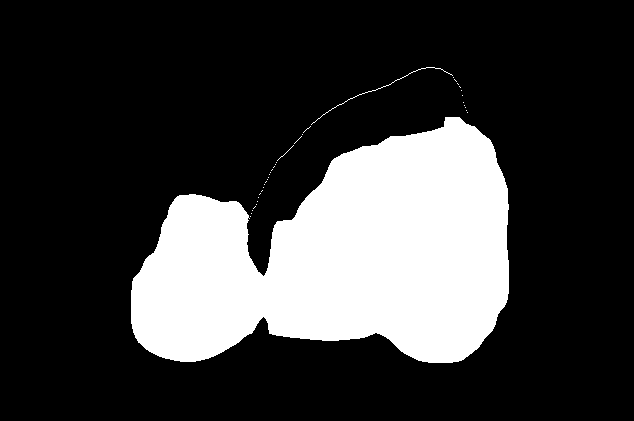

In [0]:
outline = x.object_topline(2)
x.show_mask(1,outline)

In [0]:
x.count_objects()

{'motorcycle': 1, 'person': 1}

In [0]:
x.get_objectID()

{1: 'motorcycle', 2: 'person'}

In [0]:
x.object_relations()

Analyzing object_id 1: motorcycle and object_id 2: person


{'object relations': {'next to': [],
  'above': [(2, 1), (2, 1)],
  'below': [(1, 2)],
  'touching': [(1, 2)],
  'on': [(2, 1)],
  'in': []}}

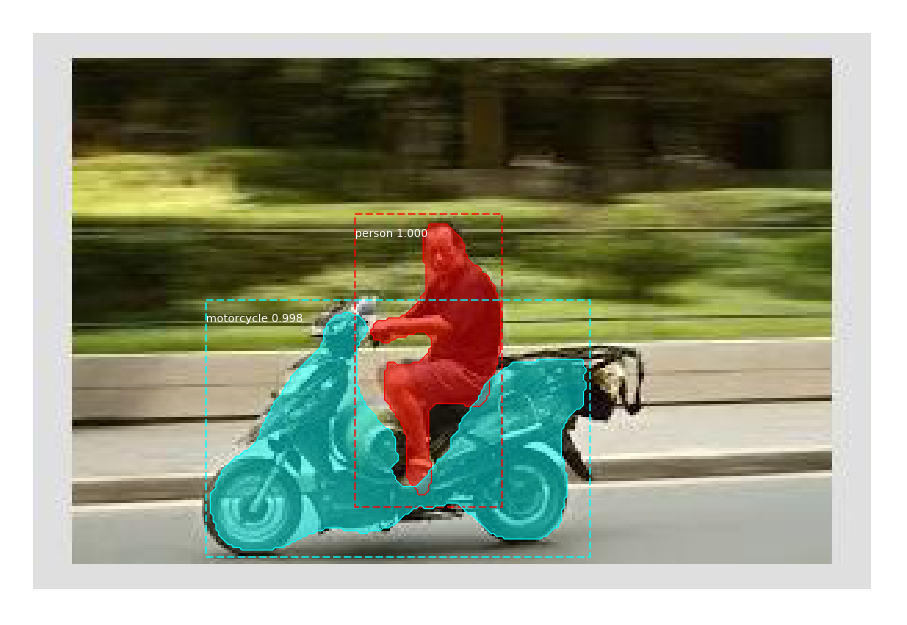

In [0]:
imagefile = '../images/mod_people_on_motorcycle2.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'motorcycle': 1, 'person': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'motorcycle'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: motorcycle


{'object relations': {'next to': [],
  'above': [(1, 2), (1, 2)],
  'below': [(2, 1)],
  'touching': [(1, 2)],
  'on': [(1, 2)],
  'in': []}}

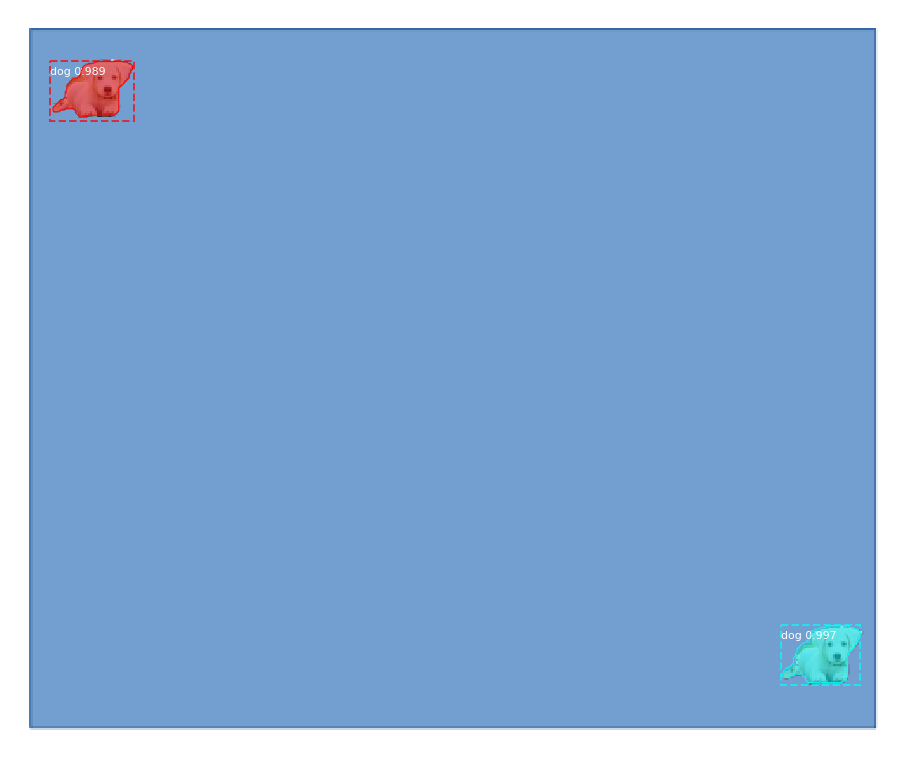

In [0]:
imagefile = '../images/dog_grid.png'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.get_objectID()

{1: 'dog', 2: 'dog'}

In [0]:
x.grid_coords(2, 5, 5)

{('A', '1')}

In [0]:
x.grid_coords(1, 5, 5)

{('E', '5')}

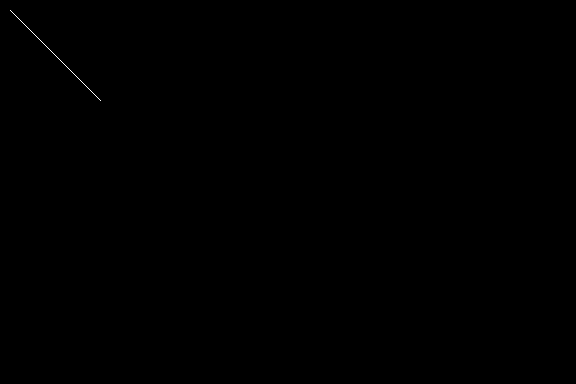

In [0]:
myimage2 = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(myimage2)
draw.line((10, 10, 100,100), fill="white")
myimage2

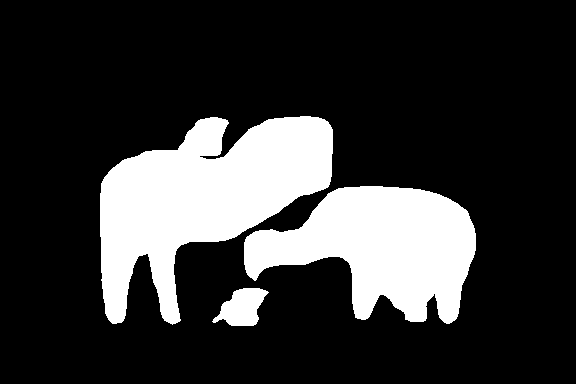

In [0]:
x.show_mask(1,2,3,4,5)

In [0]:
myimage2.paste(x.show_mask(1,2,3,4,5))

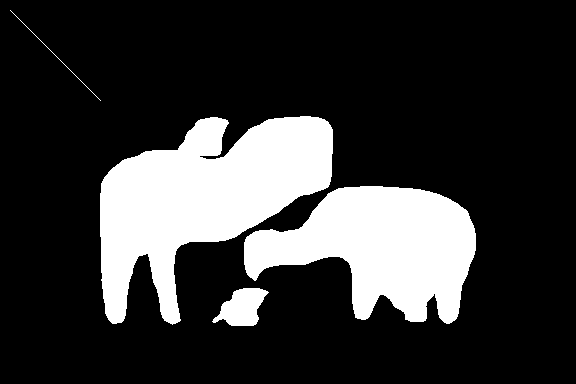

In [0]:
Image.composite(x.show_mask(1,2,3,4,5), myimage2, x.show_mask(1,2,3,4,5))

In [0]:
x.mass_box(1)

(188, 311, 308, 470)

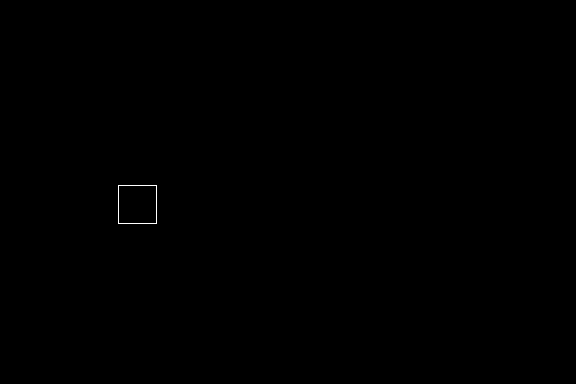

In [0]:
myimage3 = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(myimage3)
draw.rectangle(x.mass_box(2), outline="white")
myimage3

In [8]:
a = 'FreeMono.ttf'

In [17]:
fnt = ImageFont.truetype(f"Pillow/Tests/fonts/{a}", 30)

In [18]:
myimage4 = Image.new(mode='1', size=(576,384))
draw=ImageDraw.Draw(myimage4)
draw.text((10,60), "World A1", font=fnt, fill="white")

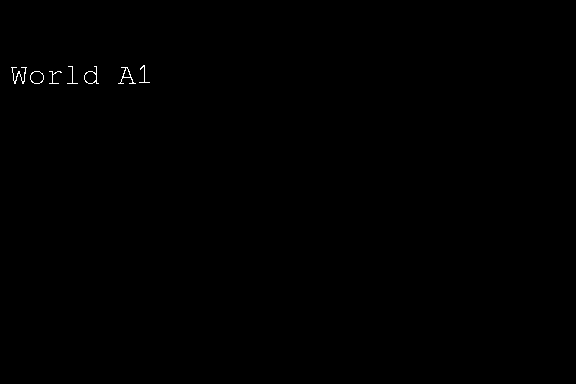

In [19]:
myimage4

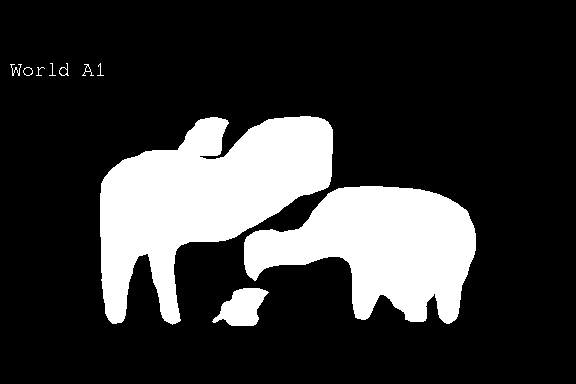

In [0]:
Image.composite(x.show_mask(1,2,3,4,5), myimage4, x.show_mask(1,2,3,4,5))

In [39]:
np.arange(0, x.img_height, x.img_height/3).astype(int)

array([  0, 128, 256])

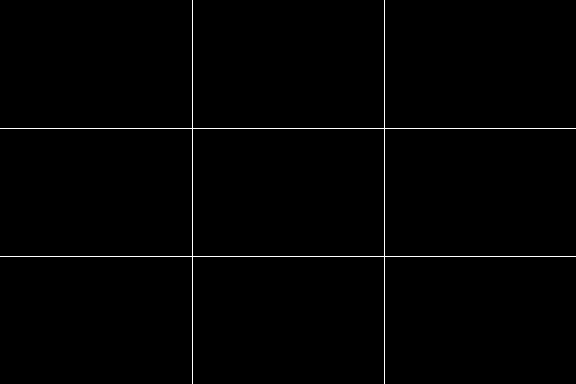

In [44]:
mygrid = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(mygrid)
draw.line((192, 0, 192, x.img_height), fill="white")
draw.line((384, 0, 384, x.img_height), fill="white")
draw.line((0, 128, x.img_width, 128), fill="white")
draw.line((0, 256, x.img_width, 256), fill="white")
mygrid

In [61]:
list(range(1,10+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]